# Variational AutoEncoder (VAE)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
import numpy as np
import matplotlib.pyplot as plt

In [7]:
!rm -f utils.py
!wget -q https://raw.githubusercontent.com/francesco-zatto/vae-mnist/master/utils.py

In [9]:
import utils

## Data preparation

In [10]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


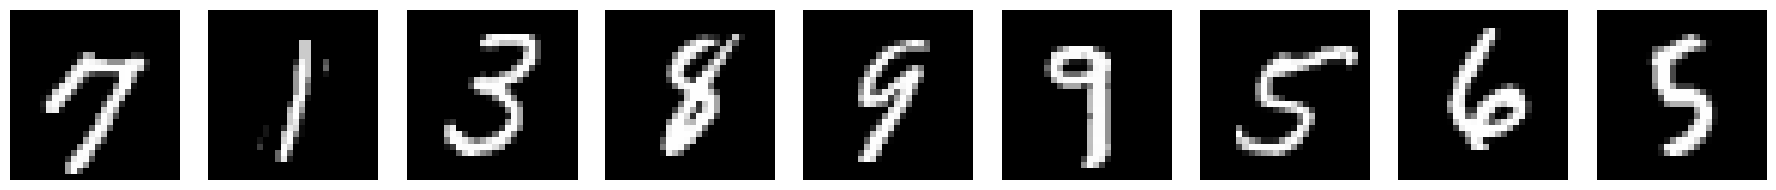

In [11]:
N_IMAGES = 9
indices = np.random.choice(len(x_train), N_IMAGES, replace=False)
images = x_train[indices]

plt.figure(figsize=(2 * N_IMAGES, 2))
for i in range(N_IMAGES):
    plt.subplot(1, N_IMAGES, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [89]:

import importlib

importlib.reload(utils)

<module 'utils' from '/content/utils.py'>

## Training

In [23]:
encoder = utils.build_encoder(utils.MNIST_IMG_SHAPE)
decoder = utils.build_decoder()
vae = utils.VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam(1e-3))

history = vae.fit(
    x_train,
    batch_size=64,
    epochs=10
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 0.0524
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0150
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0126
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0118
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0113
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0111
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0109
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0107
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0106
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0105


## Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


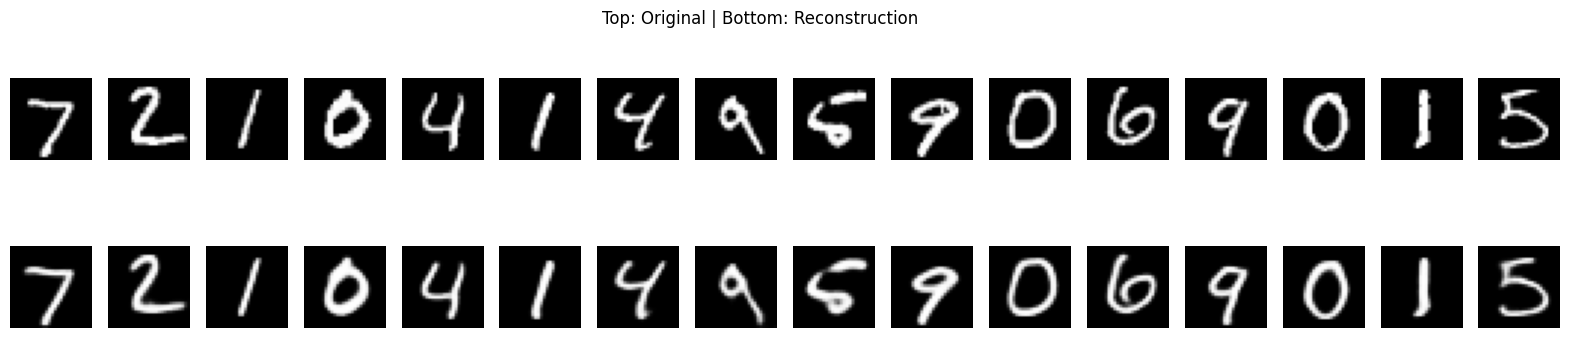

In [24]:
utils.show_images_reconstruction(vae, x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


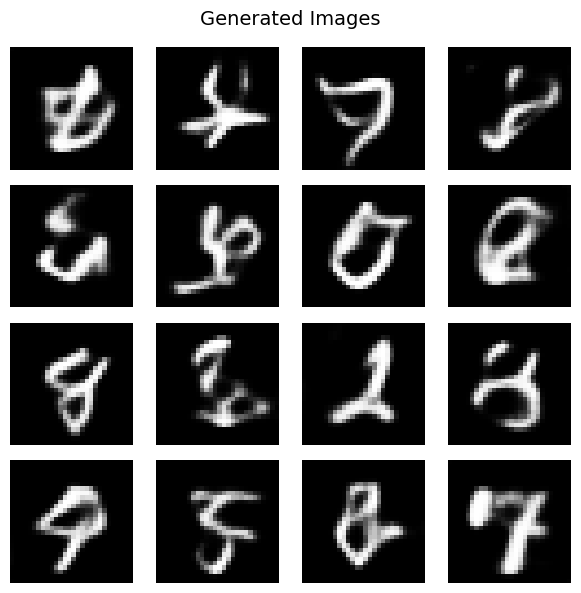

In [25]:
utils.sample_and_plot(vae)

# Conditional VAE

## Label one-hot encoding

## Training

In [90]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(y_train.reshape(-1, 1))
y_train_one_hot = ohe.transform(y_train.reshape(-1, 1)).toarray()
y_test_one_hot = ohe.transform(y_test.reshape(-1, 1)).toarray()
y_train_one_hot.shape

(60000, 10)

In [91]:
params= {
    "conditional": True,
}
cond_encoder = utils.build_encoder(utils.MNIST_IMG_SHAPE, **params)
cond_decoder = utils.build_decoder(**params)
cvae = utils.VAE(cond_encoder, cond_decoder, **params)
cvae.compile(optimizer=tf.keras.optimizers.Adam(1e-3))

cvae.fit(
    [x_train, y_train_one_hot],
    batch_size=64,
    epochs=15
)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0774
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0539
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0536
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0536
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0535
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0535
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0535
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0536
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0535
Epoch 10/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0536
Epoch 11/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0535
Epoch 12/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0535
Epoch 13/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0534
Epoch 14/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0535
Epoch 15/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - l

## Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


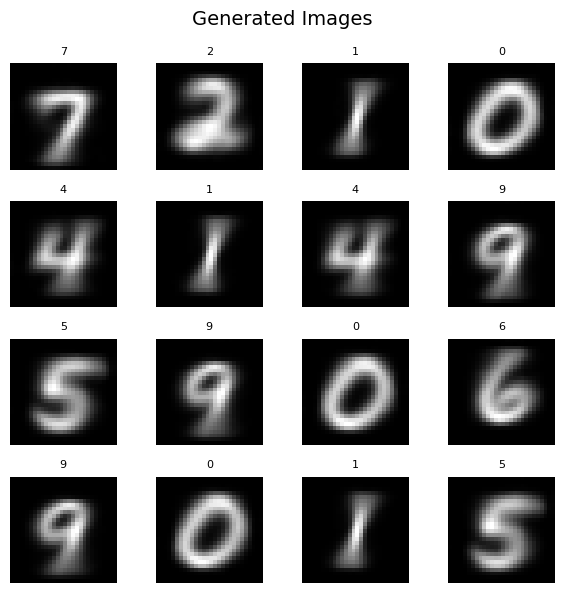

In [92]:
utils.sample_and_plot(cvae, labels=y_test_one_hot[:16])

## Visualization of CVAE latent space

In [93]:
from sklearn.decomposition import PCA

latent_space, variances = cvae.encoder.predict([x_test, y_test_one_hot])
pca = PCA(n_components=2)
xs, ys = pca.fit_transform(latent_space).T

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


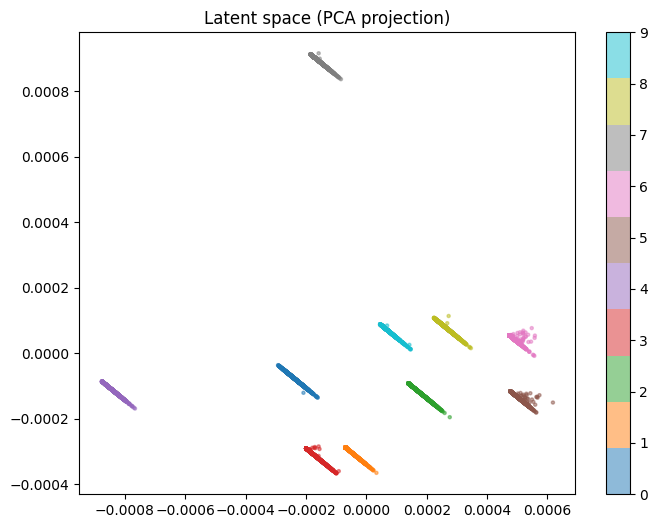

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c=y_test, cmap="tab10", alpha=0.5, s=5)
plt.colorbar()
plt.title("Latent space (PCA projection)")
plt.show()

# CVAE with CIFAR10

In [ ]:
CIFAR_IMG_SHAPE = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f'Training data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Training

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(y_train.reshape(-1, 1))
y_train_one_hot = ohe.transform(y_train.reshape(-1, 1)).toarray()
y_test_one_hot = ohe.transform(y_test.reshape(-1, 1)).toarray()
y_train_one_hot.shape

(50000, 10)

In [ ]:
# Decode from the latent space the original image
def build_cifar_decoder(conditional=False, num_classes=10):
  latent_inputs = Input(shape=(LATENT_DIM,))
  if conditional:
    labels = Input(shape=(num_classes,))
    concat_inputs = layers.Concatenate()([latent_inputs, labels])

  x = layers.Dense(7 * 7 * LATENT_DIM, activation='relu')(concat_inputs if conditional else latent_inputs)
  x = layers.Reshape((7, 7, LATENT_DIM))(x)
  x = layers.Conv2DTranspose(64, KERNEL_SIZE, strides=2, padding='same', activation='relu')(x)
  x = layers.Conv2DTranspose(32, KERNEL_SIZE, strides=2, padding='same', activation='relu')(x)
  outputs = layers.Conv2DTranspose(3, KERNEL_SIZE+1, padding='valid', activation='sigmoid')(x)
  return Model([latent_inputs, labels], outputs, name='cifar_decoder')

In [ ]:
params= {
    "conditional": True
}
cond_encoder = build_encoder(CIFAR_IMG_SHAPE, **params)
cond_decoder = build_cifar_decoder(**params)
cvae_cifar = VAE(cond_encoder, cond_decoder)
cvae_cifar.compile(optimizer=tf.keras.optimizers.Adam(1e-4))

cvae_cifar.fit(
    [x_train, y_train_one_hot],
    batch_size=32,
    epochs=20
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 313s 198ms/step - loss: 19747930112.0000
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 329s 210ms/step - loss: 18632.7344
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 344s 186ms/step - loss: 18516.4297
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 163ms/step - loss: 18440.8281
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 163ms/step - loss: 18388.7891
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 162ms/step - loss: 18466.9062
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 250s 160ms/step - loss: 18402.7910
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 160ms/step - loss: 18444.4766
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 161ms/step - loss: 18496.4160
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 159ms/step - loss: 18505.2676
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 160ms/step - loss: 18433.5742
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 160ms/step - loss: 18385.6973
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 248s 159ms/step - loss: 

## Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
(16, 32, 32, 3)


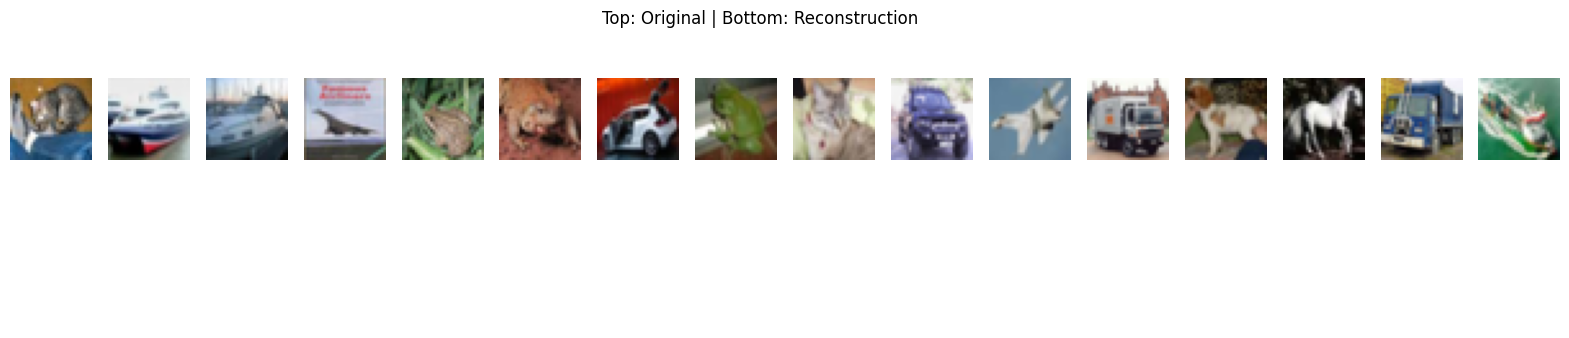

In [ ]:
_ = show_images_reconstruction(cvae_cifar, x_test, label=y_test_one_hot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


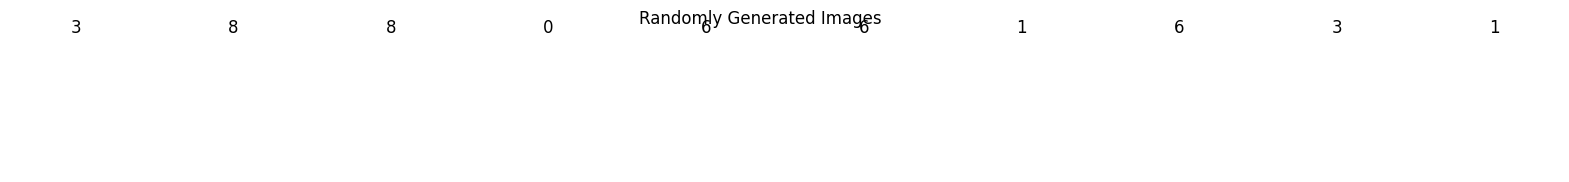

In [ ]:
sample_and_plot(cvae_cifar.decoder, label=y_test_one_hot)